# Lyrics Wordcloud Project

**Purpose:** In this project, I will be practicing web scraping with BeautifulSoup, text cleaning with RegEx, and visualization with Word Cloud.

**Objective:** To create a WordCloud based on a musical artist's lyrics.

In [43]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [48]:
URL = 'https://genius.com/Nf-let-you-down-lyrics'
page = requests.get(URL)
html = BeautifulSoup(page.text, "html.parser") # Extract the page's HTML as a string

# Scrape the song lyrics from the HTML
lyrics = html.find("div", class_="lyrics").get_text()

In [49]:
print(lyrics[:150])



[Chorus]
Feels like we're on the edge right now
I wish that I could say I'm proud
I'm sorry that I let you down
Let you down
All these voices in my 


## Clean Lyrics
Here I will look to remove punctuation to isolate words. *Note: Although "clean" in music means to remove profanity, that is not what I am doing here.*

In [81]:
def process_lyrics(lyrics, profanity_filter=False):
    lyrics = lyrics.split()
    global clean_lyrics 
    clean_lyrics = []
    for w in range(len(lyrics)):
        lyric = lyrics[w].lower()

        #remove punctuation
        lyric = re.sub(r'[^\w\s]', '', lyric) 

        # remove numbers
        lyric = re.sub(r'[0-9]+', '', lyric)

        clean_lyrics.append(lyric)

    # remove tag words/numbers
    tag_words = ['intro', 'verse', 'chorus', 'outro', 'hook', 'interlude']
    clean_lyrics = [lyric for lyric in clean_lyrics if lyric not in tag_words] 
    # clean_lyrics.remove(['Intro', 'Verse', 'Chorus', 'Outro'])
    
    # remove profanity
#     if profanity_filter:
#         profane_words = []
#         clean_lyrics = [lyric for lyric in clean_lyrics if lyric not in profane_words]

    # remove empty strings
    clean_lyrics.remove('')
    
    return clean_lyrics

In [65]:
process_lyrics(lyrics)

['feels',
 'like',
 'were',
 'on',
 'the',
 'edge',
 'right',
 'now',
 'i',
 'wish',
 'that',
 'i',
 'could',
 'say',
 'im',
 'proud',
 'im',
 'sorry',
 'that',
 'i',
 'let',
 'you',
 'down',
 'let',
 'you',
 'down',
 'all',
 'these',
 'voices',
 'in',
 'my',
 'head',
 'get',
 'loud',
 'i',
 'wish',
 'that',
 'i',
 'could',
 'shut',
 'them',
 'out',
 'im',
 'sorry',
 'that',
 'i',
 'let',
 'you',
 'down',
 'lelelet',
 'you',
 'down',
 'yeah',
 'i',
 'guess',
 'im',
 'a',
 'disappointment',
 'doin',
 'everything',
 'i',
 'can',
 'i',
 'dont',
 'wanna',
 'make',
 'you',
 'disappointed',
 'its',
 'annoying',
 'i',
 'just',
 'wanna',
 'make',
 'you',
 'feel',
 'like',
 'everything',
 'i',
 'ever',
 'do',
 'was',
 'never',
 'tryna',
 'make',
 'an',
 'issue',
 'for',
 'you',
 'but',
 'i',
 'guess',
 'the',
 'more',
 'you',
 'thought',
 'about',
 'everything',
 'you',
 'were',
 'never',
 'even',
 'wrong',
 'in',
 'the',
 'first',
 'place',
 'right',
 'yeah',
 'ima',
 'just',
 'ignore',
 'you'

## Define Stop Words

In [89]:
stop_words = ['is','you','your','and', 'the', 'to', 'from', 'or', 'I', 'for', 'do', 'get', 'not', 'em', 'yall', 'did',
              'here', 'in', 'im', 'have', 'on', 'a', 'i', 'it', 'of', 'that', 'with', 'me', 'like', 'who', 'down', 'been',
             'but', 'as', 'they', 'what', 'my', 'be', 'all', 'its', 'while', 'dont', 'was', 'so', 'will', 'now', 'when', 
              'if', 'are', 'at', 'an', 'youre', 'got', 'how', 'he', 'she', 'this', 'these','can', 'could', 'then', 'into', 
              'up', 'back', 'know', 'too', 'yeah', 'go', 'no', 'just', 'ima', 'ive', 'say', 'cause', 'okay', 'let', 
             'oh', 'woo', 'aint', 'put', 'we', 'cant'] + list(STOPWORDS)

## WordCloud

In [59]:
def make_wordcloud(lyrics):
    wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000
                          , min_font_size = 20).generate(" ".join(lyrics))
    #plot the word cloud
    fig = plt.figure(figsize = (8,8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

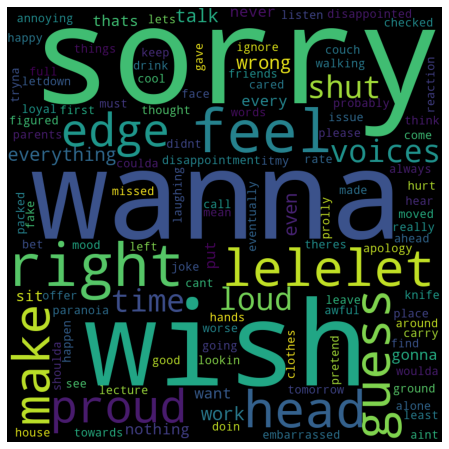

In [66]:
make_wordcloud(clean_lyrics)

## Expanding by Using More Songs

In [86]:
URLs = ['https://genius.com/Nf-let-you-down-lyrics', 'https://genius.com/Nf-the-search-lyrics', 'https://genius.com/Nf-paid-my-dues-lyrics',
       'https://genius.com/Nf-why-lyrics', 'https://genius.com/Nf-when-i-grow-up-lyrics']
multi_lyrics = ""
for url in URLs:
    page = requests.get(url)
    html = BeautifulSoup(page.text, "html.parser") # Extract the page's HTML as a string
    lyrics_temp = html.find("div", class_="lyrics").get_text()

    # Scrape the song lyrics from the HTML
    multi_lyrics += ' '+lyrics_temp

In [87]:
process_lyrics(multi_lyrics)

['feels',
 'like',
 'were',
 'on',
 'the',
 'edge',
 'right',
 'now',
 'i',
 'wish',
 'that',
 'i',
 'could',
 'say',
 'im',
 'proud',
 'im',
 'sorry',
 'that',
 'i',
 'let',
 'you',
 'down',
 'let',
 'you',
 'down',
 'all',
 'these',
 'voices',
 'in',
 'my',
 'head',
 'get',
 'loud',
 'i',
 'wish',
 'that',
 'i',
 'could',
 'shut',
 'them',
 'out',
 'im',
 'sorry',
 'that',
 'i',
 'let',
 'you',
 'down',
 'lelelet',
 'you',
 'down',
 'yeah',
 'i',
 'guess',
 'im',
 'a',
 'disappointment',
 'doin',
 'everything',
 'i',
 'can',
 'i',
 'dont',
 'wanna',
 'make',
 'you',
 'disappointed',
 'its',
 'annoying',
 'i',
 'just',
 'wanna',
 'make',
 'you',
 'feel',
 'like',
 'everything',
 'i',
 'ever',
 'do',
 'was',
 'never',
 'tryna',
 'make',
 'an',
 'issue',
 'for',
 'you',
 'but',
 'i',
 'guess',
 'the',
 'more',
 'you',
 'thought',
 'about',
 'everything',
 'you',
 'were',
 'never',
 'even',
 'wrong',
 'in',
 'the',
 'first',
 'place',
 'right',
 'yeah',
 'ima',
 'just',
 'ignore',
 'you'

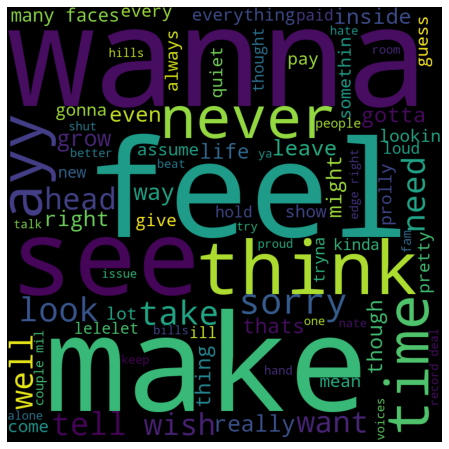

In [90]:
make_wordcloud(clean_lyrics)

## Potential Next Steps

1. Utilize the Genius API to make requests to artists then scrape their songs
    - Better yet, utilize the library by John W. Miller (https://www.johnwmillr.com/scraping-genius-lyrics/)
2. Try to extract themes from an artists songs
3. Split an artist's songs into to 2 (past and present) to see how their words/themes have changed

## Other Stuff

#### URLs By Artist

In [ ]:
# EMINEM
URLs = ['https://genius.com/Eminem-rap-god-lyrics', 'https://genius.com/Eminem-godzilla-lyrics', 'https://genius.com/Eminem-lucky-you-lyrics',
        'https://genius.com/Eminem-the-ringer-lyrics', 'https://genius.com/Eminem-venom-lyrics']

# NF
URLs = ['https://genius.com/Nf-let-you-down-lyrics', 'https://genius.com/Nf-the-search-lyrics', 'https://genius.com/Nf-paid-my-dues-lyrics',
       'https://genius.com/Nf-why-lyrics', 'https://genius.com/Nf-when-i-grow-up-lyrics']

# mumford and sons
URLs = ['https://genius.com/Mumford-and-sons-little-lion-man-lyrics', 'https://genius.com/Mumford-and-sons-i-will-wait-lyrics', 'https://genius.com/Mumford-and-sons-the-cave-lyrics',
       'https://genius.com/Mumford-and-sons-believe-lyrics']

# of monsters and men
URLs = ['https://genius.com/Of-monsters-and-men-little-talks-lyrics', 'https://genius.com/Of-monsters-and-men-dirty-paws-lyrics', 'https://genius.com/Of-monsters-and-men-king-and-lionheart-lyrics',
       'https://genius.com/Of-monsters-and-men-mountain-sound-lyrics', 'https://genius.com/Of-monsters-and-men-love-love-love-lyrics']